importing modules

In [1]:
import tensorflow as tf
from tensorflow import keras 
from keras import layers, models 
from keras.datasets import cifar10
import time
import matplotlib.pyplot as plt

data manipulation

In [2]:
gpus = tf.config.list_physical_devices('GPU')

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


RMSprop optimization

In [3]:
model_1 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(10, activation='softmax')
    ]
)
model_1.summary()

model_1.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9, epsilon=1e-07), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T1= time.time()
history_1 = model_1.fit(x_train, y_train, epochs=100, batch_size=2048, validation_split=0.5)
T2= time.time()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 3s 92ms/step - loss: 2.9323 - accuracy: 0.1416 - val_loss: 2.4487 - val_accuracy: 0.1443
Epoch 2/100
13/13 [==============================] - 0s 33ms/step - loss: 2.3042 - accuracy: 0.2028 - val_loss: 2.2632 - val_accuracy: 0.2288
Epoch 3/100
13/13 [==============================] - 0s 25ms/step - loss: 2.2546 - accuracy: 0.2294 - val_loss: 2.2405 - val_accuracy: 0.2358
Epoch 4/100
13/13 [===

evaluating 

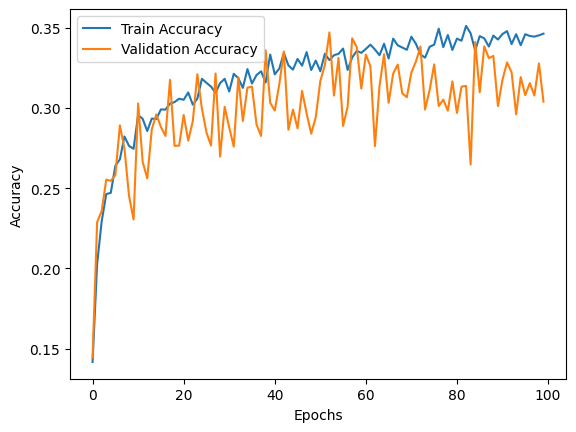

313/313 [==============================] - 1s 4ms/step - loss: 2.1346 - accuracy: 0.3070
Test Loss: 2.134615659713745
Test Accuracy: 0.3070000112056732
Time taken: 44.789886713027954


In [4]:
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_1.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T2-T1}')

Nadam

In [5]:
model_2 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(10, activation='softmax')
    ]
)
model_2.summary()

model_2.compile(
    optimizer=keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T3= time.time()
history_2 = model_2.fit(x_train, y_train, epochs=100, batch_size=2048, validation_split=0.5)
T4= time.time()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 79ms/step - loss: 2.3346 - accuracy: 0.1516 - val_loss: 2.2284 - val_accuracy: 0.1878
Epoch 2/100
13/13 [==============================] - 0s 29ms/step - loss: 2.1449 - accuracy: 0.2247 - val_loss: 2.1158 - val_accuracy: 0.2236
Epoch 3/100
13/13 [==============================] - 1s 43ms/step - loss: 2.0770 - accuracy: 0.2520 - val_loss: 2.0257 - val_accuracy: 0.2786
Epoch 4/100
13/13 [=

evaluating

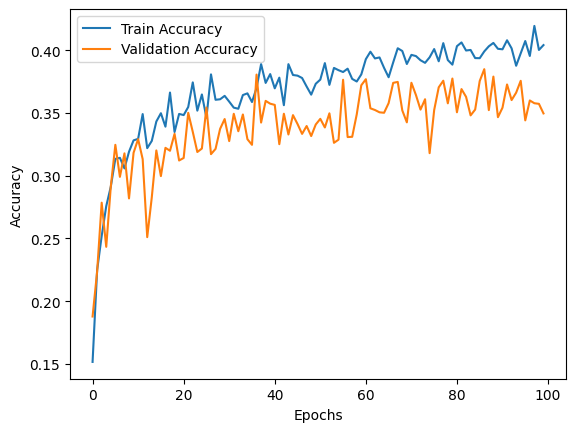

313/313 [==============================] - 1s 3ms/step - loss: 1.8266 - accuracy: 0.3526
Test Loss: 1.8265576362609863
Test Accuracy: 0.35260000824928284
Time taken: 38.41224980354309


In [6]:
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_2.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T4-T3}')

NAG

In [7]:
model_3 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(10, activation='softmax')
    ]
)
model_3.summary()

model_3.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True), 
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T5= time.time()
history_3 = model_3.fit(x_train, y_train, epochs=100, batch_size=2048, validation_split=0.5)
T6= time.time()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 2s 89ms/step - loss: 2.2551 - accuracy: 0.1849 - val_loss: 2.0797 - val_accuracy: 0.2476
Epoch 2/100
13/13 [==============================] - 0s 26ms/step - loss: 1.9991 - accuracy: 0.2893 - val_loss: 1.9641 - val_accuracy: 0.3015
Epoch 3/100
13/13 [==============================] - 0s 25ms/step - loss: 1.9191 - accuracy: 0.3289 - val_loss: 1.9157 - val_accuracy: 0.3290
Epoch 4/100
13/13 [=

evaluating

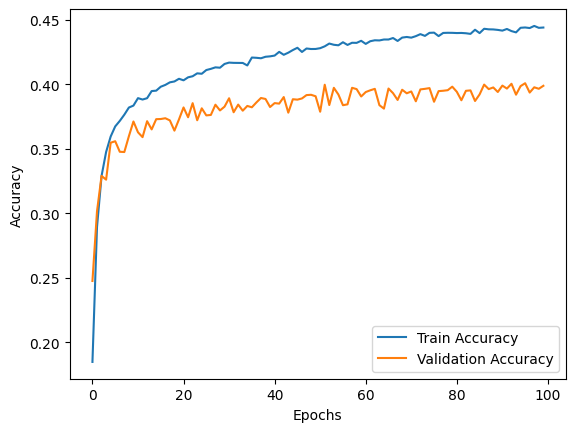

313/313 [==============================] - 1s 3ms/step - loss: 1.7343 - accuracy: 0.3960
Test Loss: 1.7343146800994873
Test Accuracy: 0.3959999978542328
Time taken: 37.322229862213135


In [8]:
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_3.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T6-T5}')

SGDR

In [9]:
initial_lr = 0.01
t_0 = 10  # Number of steps for the first cycle
t_mult = 2  # Factor by which t_0 is multiplied after each cycle

lr_schedule = tf.keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=initial_lr,
    first_decay_steps=t_0,
    t_mul=t_mult
)

model_4 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(10, activation='softmax')
    ]
)
model_4.summary()

model_4.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T7= time.time()
history_4 = model_4.fit(x_train, y_train, epochs=100, batch_size=2048, validation_split=0.5)
T8= time.time()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 1s 83ms/step - loss: 2.3140 - accuracy: 0.1319 - val_loss: 2.2555 - val_accuracy: 0.1601
Epoch 2/100
13/13 [==============================] - 0s 26ms/step - loss: 2.2289 - accuracy: 0.1700 - val_loss: 2.2145 - val_accuracy: 0.1770
Epoch 3/100
13/13 [==============================] - 0s 36ms/step - loss: 2.2005 - accuracy: 0.1866 - val_loss: 2.1833 - val_accuracy: 0.1866
Epoch 4/100
13/13 [=

evaluating

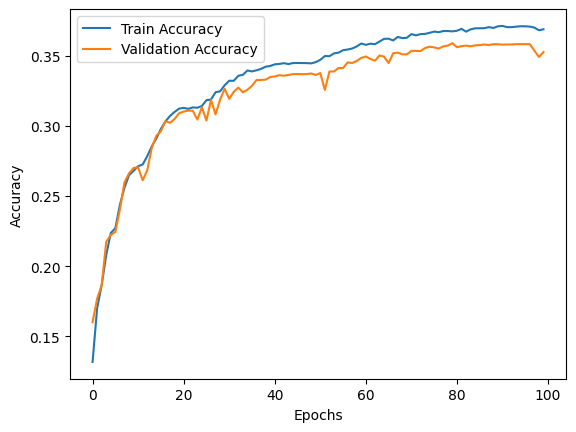

313/313 [==============================] - 1s 4ms/step - loss: 1.8570 - accuracy: 0.3534
Test Loss: 1.8570142984390259
Test Accuracy: 0.35339999198913574
Time taken: 37.422054290771484


In [10]:
plt.plot(history_4.history['accuracy'], label='Train Accuracy')
plt.plot(history_4.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_4.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T8-T7}')

Learning Rate Schedulers(Exponential Decay)

In [11]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1024,
    decay_rate=0.1,
    staircase=False  # If True, applies decay in discrete intervals (staircase effect)
)

model_5 = models.Sequential(
    [
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(10, activation='softmax')
    ]
)
model_5.summary()

model_5.compile(
    optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
    loss=keras.losses.SparseCategoricalCrossentropy(), 
    metrics=['accuracy'], 
    loss_weights=None,
    sample_weight_mode=None, 
    weighted_metrics=None
)


T9= time.time()
history_5 = model_5.fit(x_train, y_train, epochs=100, batch_size=2048, validation_split=0.5)
T10= time.time()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                30730     
                                                                 
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 2s 96ms/step - loss: 2.3029 - accuracy: 0.1428 - val_loss: 2.2415 - val_accuracy: 0.1671
Epoch 2/100
13/13 [==============================] - 0s 37ms/step - loss: 2.2032 - accuracy: 0.1960 - val_loss: 2.1775 - val_accuracy: 0.2095
Epoch 3/100
13/13 [==============================] - 0s 34ms/step - loss: 2.1512 - accuracy: 0.2299 - val_loss: 2.1371 - val_accuracy: 0.2297
Epoch 4/100
13/13 [=

evaluating

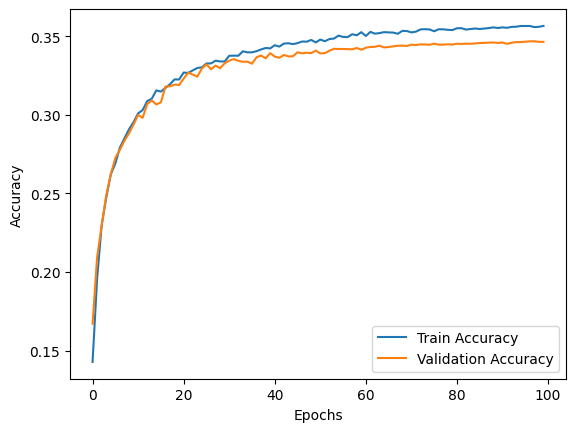

313/313 [==============================] - 1s 4ms/step - loss: 1.8800 - accuracy: 0.3500
Test Loss: 1.8799638748168945
Test Accuracy: 0.3499999940395355
Time taken: 37.9292266368866


In [12]:
plt.plot(history_5.history['accuracy'], label='Train Accuracy')
plt.plot(history_5.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_5.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T10-T9}')

Learning Rate Schedulers(Step Decay)

In [13]:
from keras.callbacks import LearningRateScheduler

# Define the custom step decay function
def step_decay(epoch, initial_lr=0.01, decay_rate=0.5, decay_steps=10):
    lr = initial_lr * (decay_rate ** (epoch // decay_steps))
    return lr

# Build a simple feedforward neural network
model_6 = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Flatten the input images (32, 32, 3) to 3072
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (e.g., classification)
])

# Compile the model using SGD optimizer with the initial learning rate
model_6.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

# Define a LearningRateScheduler callback using the custom step decay function
lr_scheduler = LearningRateScheduler(step_decay)

T11= time.time()
history_6 = model_6.fit(x_train, y_train, validation_split=0.5, epochs=100, batch_size=2048, callbacks=[lr_scheduler])
T12= time.time()




Epoch 1/100
13/13 [==============================] - 1s 85ms/step - loss: 2.3124 - accuracy: 0.1423 - val_loss: 2.2369 - val_accuracy: 0.1682 - lr: 0.0100
Epoch 2/100
13/13 [==============================] - 1s 42ms/step - loss: 2.2073 - accuracy: 0.1889 - val_loss: 2.1770 - val_accuracy: 0.2126 - lr: 0.0100
Epoch 3/100
13/13 [==============================] - 0s 29ms/step - loss: 2.1555 - accuracy: 0.2226 - val_loss: 2.1415 - val_accuracy: 0.2195 - lr: 0.0100
Epoch 4/100
13/13 [==============================] - 0s 26ms/step - loss: 2.1184 - accuracy: 0.2410 - val_loss: 2.1084 - val_accuracy: 0.2452 - lr: 0.0100
Epoch 5/100
13/13 [==============================] - 0s 27ms/step - loss: 2.0881 - accuracy: 0.2581 - val_loss: 2.0780 - val_accuracy: 0.2661 - lr: 0.0100
Epoch 6/100
13/13 [==============================] - 0s 27ms/step - loss: 2.0647 - accuracy: 0.2694 - val_loss: 2.0627 - val_accuracy: 0.2745 - lr: 0.0100
Epoch 7/100
13/13 [==============================] - 0s 26ms/step - lo

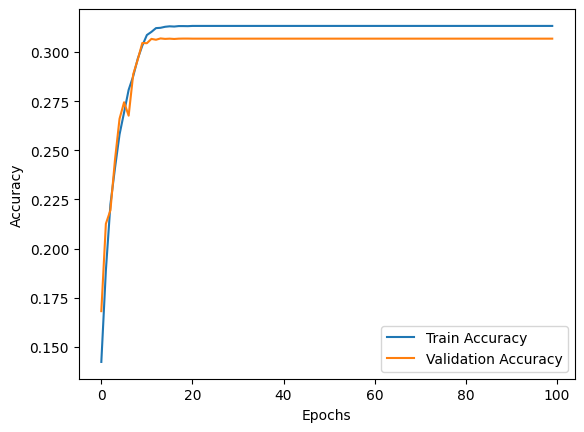

313/313 [==============================] - 1s 4ms/step - loss: 1.9876 - accuracy: 0.3102
Test Loss: 1.987600564956665
Test Accuracy: 0.3102000057697296
Time taken: 38.1399245262146


In [14]:
plt.plot(history_6.history['accuracy'], label='Train Accuracy')
plt.plot(history_6.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss,accuracy =model_6.evaluate(x_test,y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')
print(f'Time taken: {T12-T11}')